In [1]:
%matplotlib inline

import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Il(i0, R, L, E, t):
    i = np.ones(t.shape[0])
    i[0] = i0
    dt = t[1] - t[0]
    for j in range(1, t.shape[0]):
        i[j] = i[j-1] * np.exp(-R*dt/L) + (E[j]/R) * (1 - np.exp(-R*dt/L))
        
    return i

In [3]:
def PWM(V_H, V_L, T_pwm, D, t):
    u = np.ones(t.shape[0])
    T = t[1] - t[0]
    L = int(T_pwm / T)
    up_cycle = int(L * D)
    for i in range(0, u.shape[0], L):
        u[i:i+up_cycle] *= V_H
        u[i+up_cycle:i+L] *= V_L
        
    return u

In [374]:
R = 6.25 ; L = 16.5e-3 ; F_PWM = 15625 ; F_S = F_PWM / 2
t = np.arange(0, 30e-3, 1/1e6)
out_max = 1022
out_min = 1
set_point = 600
Ki = 100
Kp = 30

samp_u = 1 / (F_S * (t[1] - t[0]))
print("Samp. ration = " + str(samp_u))
cycles = int(t.shape[0] / samp_u)

il = np.zeros(t.shape[0])
v_pwm = np.zeros(t.shape[0])
D_v = np.ones(t.shape[0])
err_v = np.ones(t.shape[0])
integ_v = np.ones(t.shape[0])
meas_v = np.ones(t.shape[0])

i0 = 0
integ = 0

for i in range(0, cycles):
    t0_i = int(i * samp_u)
    tn_i = int(t0_i + samp_u)
    
    v_i0 = i0 * 0.015 * 90 + 2.5
    
    meas = int((v_i0 / 5) * 1023)
    meas = meas if meas <= 1023 else 1023
    meas = meas if meas >= 0 else 0
    
    err = set_point - meas 
    
    integ += (Ki * err) >> 9
    
    integ = integ if integ >= -2 * out_max else -2 * out_max
    integ = integ if integ <= 2 * out_max else 2 * out_max
    
    out = int(((Kp * err) >> 4) + integ)
    
    out = out if out >= out_min else out_min
    out = out if out <= out_max else out_max

    D = out / 1023.0
    
    v_pwm[t0_i:tn_i] = PWM(22, -22, 1/F_PWM, D, t[t0_i:tn_i])

    il[t0_i:tn_i] = Il(i0, R, L, v_pwm[t0_i:tn_i], t[t0_i:tn_i])
    D_v[t0_i:tn_i] *= D
    err_v[t0_i:tn_i] *= err
    integ_v[t0_i:tn_i] *= integ
    meas_v[t0_i:tn_i] *= meas
    
    i0 = il[tn_i-1]
    
print(D_v[t.shape[0]-50])

Samp. ration = 128.0
0.5542521994134897


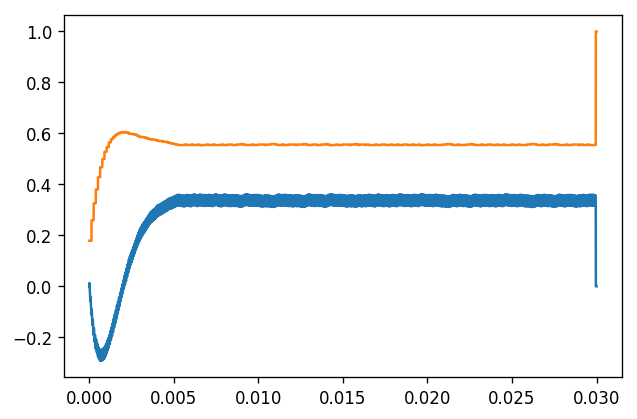

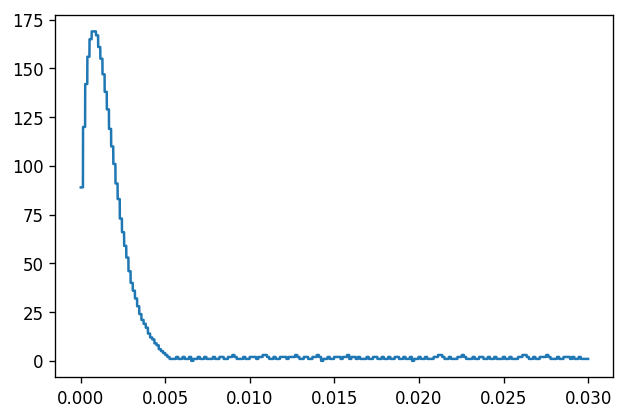

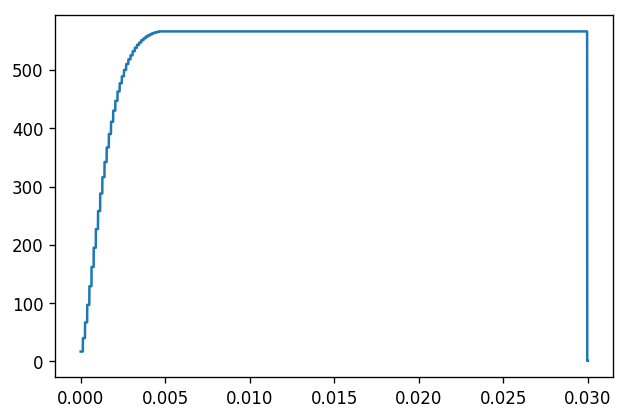

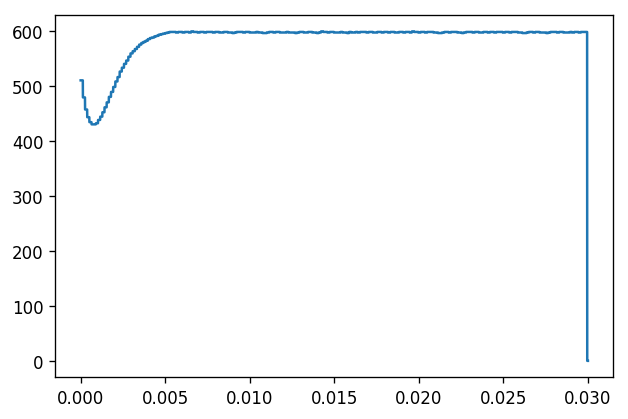

In [375]:
plt.figure(dpi=120)
plt.plot(t, il, t, D_v) 
plt.figure(dpi=120)
plt.plot(t, err_v)
plt.figure(dpi=120)
plt.plot(t, integ_v)
plt.figure(dpi=120)
plt.plot(t, meas_v)

In [93]:
t = np.arange(0, 10e-3, 1/1e6)
V = 22 * np.ones(t.shape[0])
il = Il(0, 6.25, 16.5e-3, V, t)

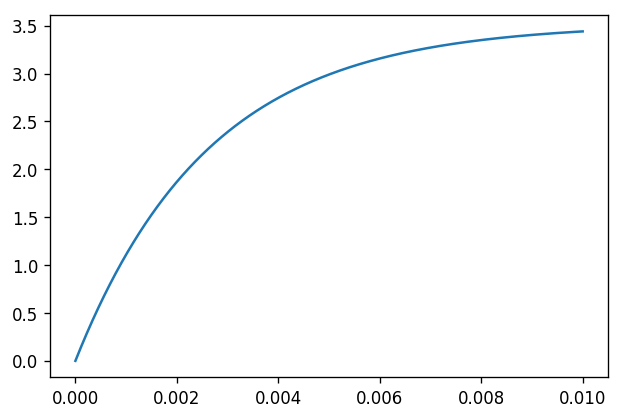

In [94]:
plt.figure(dpi=120)
plt.plot(t, il) 